In [162]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
df = pd.read_csv('spam_ham.csv',encoding='latin1')

In [164]:
df.head(10)

,label,text
0,Ham,at http samba sernet de ma bzr samba escapenum...
1,Ham,following please find daily enrononline execut...
2,Ham,you have received this email because the reque...
3,Ham,i need phone numbers for customers invited to ...
4,Spam,hi i am tired this afternoon i am escapenumber...
5,Spam,forget spam blockers !\nget smart spam control...
6,Spam,bio matrix scientific grescapenumberup inc sym...
7,Spam,cialis softabs are better than pfizer viagra a...
8,Spam,show inside gannett foundation station project...
9,Spam,stockupticks com image welcome to the stockup...


In [165]:
df.shape

(4070, 2)

In [166]:
df

,label,text
0,Ham,at http samba sernet de ma bzr samba escapenum...
1,Ham,following please find daily enrononline execut...
2,Ham,you have received this email because the reque...
3,Ham,i need phone numbers for customers invited to ...
4,Spam,hi i am tired this afternoon i am escapenumber...
...,...,...
4065,Ham,think would good us settle standard level dail...
4066,Ham,hi paul escapelong still oregon sunriver clean...
4067,Ham,on thu escapenumber jul escapenumber escapenum...
4068,Spam,get all the software imaginable for bottom pri...


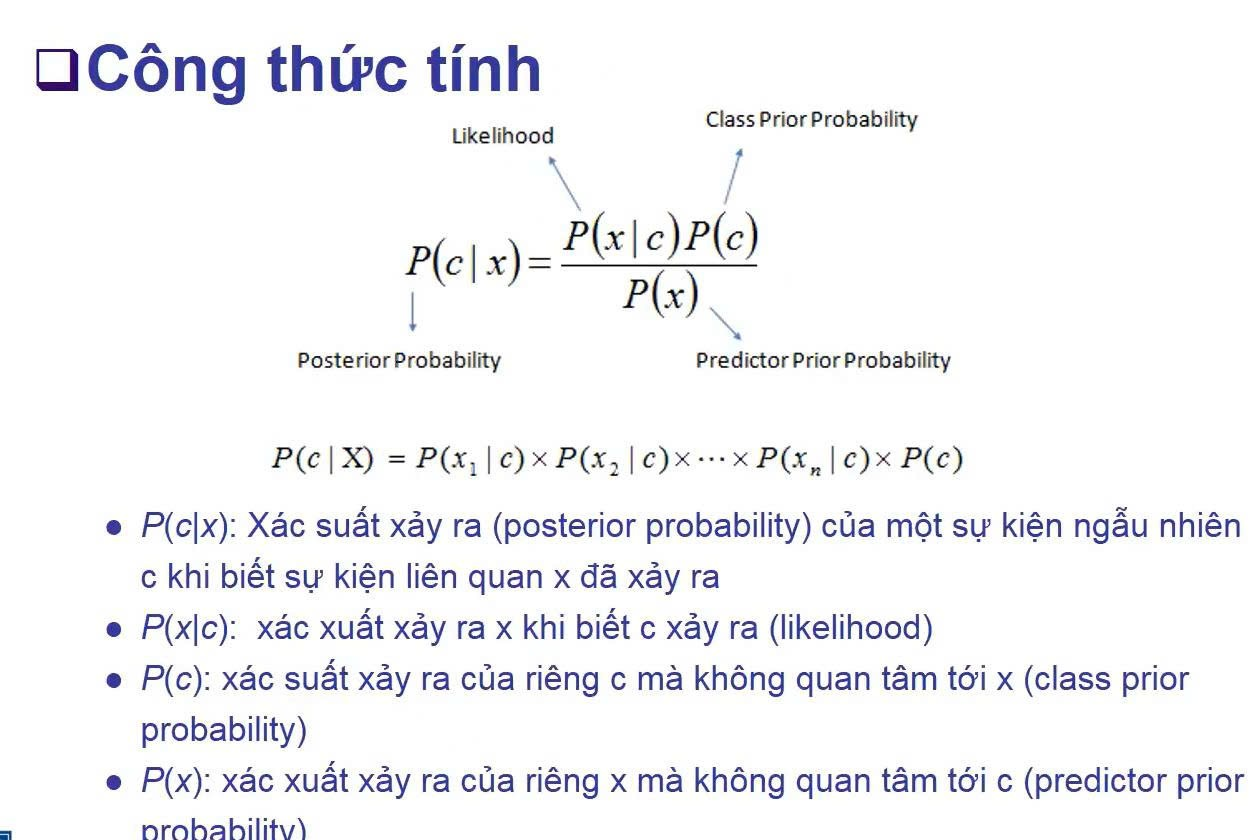

In [167]:
class NaiveBayes:
    def fit(self, X, y):
        # Nếu là ma trận sparse (TF-IDF hoặc CountVectorizer)
        if not isinstance(X, np.ndarray):
            X = X.toarray()

        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # Khởi tạo tham số
        self._class_feature_count = np.zeros((n_classes, n_features), dtype=np.float64)
        self._class_count = np.zeros(n_classes, dtype=np.float64)

        # Tính tổng đếm từ và số mẫu cho từng lớp
        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._class_feature_count[idx, :] = X_c.sum(axis=0)
            self._class_count[idx] = X_c.shape[0]

        # Thêm smoothing để tránh chia cho 0
        self._class_feature_count += 1
        self._feature_log_prob = np.log(
            self._class_feature_count / self._class_feature_count.sum(axis=1, keepdims=True)
        )
        self._class_log_prior = np.log(self._class_count / n_samples)

    def _predict(self, x):
        if not isinstance(x, np.ndarray):
            x = x.toarray().ravel()

        # Tính log(p(c)) + sum(x_i * log(p(x_i | c)))
        log_probs = []
        for idx, c in enumerate(self._classes):
            log_likelihood = np.sum(x * self._feature_log_prob[idx])
            log_prob = self._class_log_prior[idx] + log_likelihood
            log_probs.append(log_prob)
        return self._classes[np.argmax(log_probs)]

    def predict(self, X):
        if not isinstance(X, np.ndarray):
            X = X.toarray()
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

Accuracy: 0.9287469287469288
Precision: 0.98125
Recall: 0.8579234972677595
F1: 0.9154518950437318


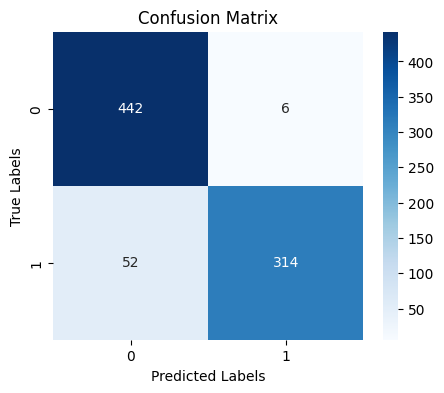

In [168]:
data = pd.read_csv("spam_ham.csv", encoding='latin-1') 

data['label_num'] = data['label'].map({'Ham': 0, 'Spam': 1})

X = data['text']
y = data['label_num']

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa văn bản
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = NaiveBayes()

model.fit(X_train_vec, y_train)

predict = model.predict(X_test_vec)

accuracy = accuracy_score(y_test, predict)
precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)
f1 = f1_score(y_test, predict)
print (f"Accuracy: {accuracy}")
print (f"Precision: {precision}")
print (f"Recall: {recall}")
print (f"F1: {f1}")

cm = confusion_matrix(y_test, predict)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
